In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset
import torchvision.transforms as T
import numpy as np
import time
from project_utilities import ValueSet, Loss, efficiency
from sklearn.model_selection import train_test_split


In [2]:
train_set_idx, val_set_idx=train_test_split(list(range(1,80)),test_size=10)
len(train_set_idx)

69

In [3]:
DEVICE = ('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
DEVICE

'cuda:0'

In [5]:
%env CUBLAS_WORKSPACE_CONFIG=:4096:8

env: CUBLAS_WORKSPACE_CONFIG=:4096:8


In [6]:
random_seed= 123
NUM_EPOCHS=2
LEARNING_RATE=0.001
BATCH_SIZE=128

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)



Mounted at /content/gdrive/


In [8]:

%cd /content/gdrive/MyDrive/Project/data

/content/gdrive/MyDrive/Project/data


In [9]:
class MyDataset(torch.utils.data.Dataset): 
  def __init__(self, setID): 
        'Initialization' 
        npz_files_content = np.load("./Set_"+str(setID)+".npz")  
         
        self.X_set = torch.tensor(npz_files_content['X'])    
        self.y_set = torch.tensor(npz_files_content['y']) 
  def __len__(self): 
        'Denotes the total number of samples' 
        return len(self.y_set) 
  def __getitem__(self, index): 
        'Generates one sample of data' 
        # Select sample 
        X = self.X_set[index] 
        y = self.y_set[index] 
        return X, y

In [10]:
train_set_idx

[21,
 43,
 20,
 56,
 63,
 6,
 11,
 15,
 37,
 47,
 35,
 48,
 17,
 51,
 31,
 26,
 44,
 10,
 55,
 14,
 8,
 40,
 65,
 54,
 52,
 70,
 1,
 28,
 77,
 50,
 24,
 75,
 53,
 76,
 30,
 68,
 41,
 79,
 22,
 71,
 62,
 38,
 25,
 57,
 49,
 12,
 66,
 5,
 16,
 13,
 3,
 27,
 64,
 2,
 74,
 34,
 73,
 45,
 69,
 78,
 32,
 39,
 23,
 58,
 29,
 36,
 67,
 46,
 7]

In [11]:
npz_files_content = np.load("./Set_"+str(4)+".npz")  
         
X_set = np.array(npz_files_content['X'])    
y_set = np.array(npz_files_content['y']) 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Visualizing the data of one sample in X_set

In [13]:
X_set[4000][3].shape

(4000,)

Histogram

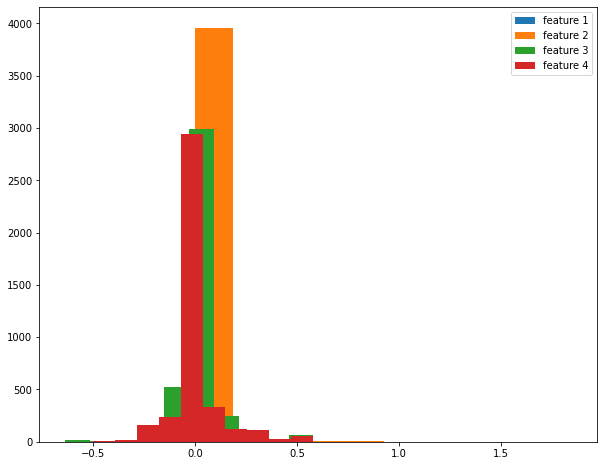

In [14]:
plt.figure(figsize=(10,8))
for i in range(4):
  plt.hist(X_set[0][i])
  labels= ["feature 1","feature 2", "feature 3","feature 4"]
  plt.legend(labels,loc="upper right")

In [15]:
import seaborn as sns

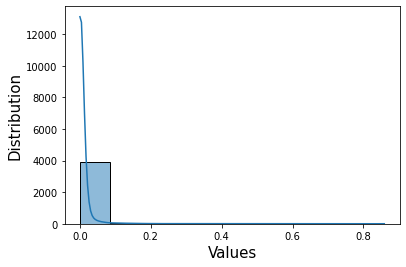

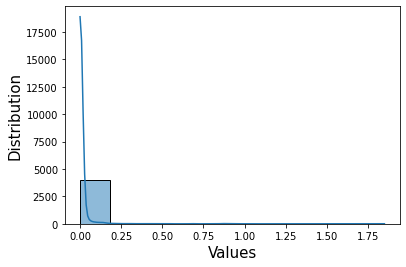

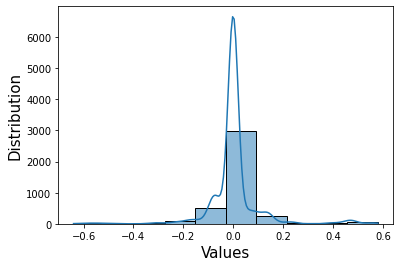

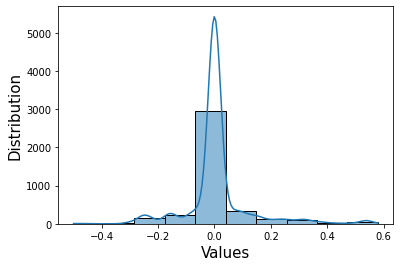

In [16]:
for i in range(4):
  sns.histplot(X_set[0][i], kde=True, bins=10)  
  plt.ylabel("Distribution",fontsize=15)
  plt.xlabel("Values",fontsize=15)
  plt.show()

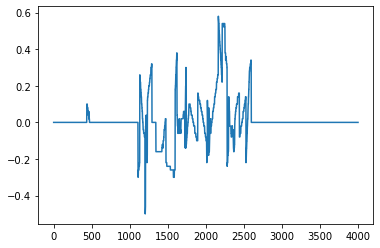

In [17]:
plt.plot(X_set[0][3])

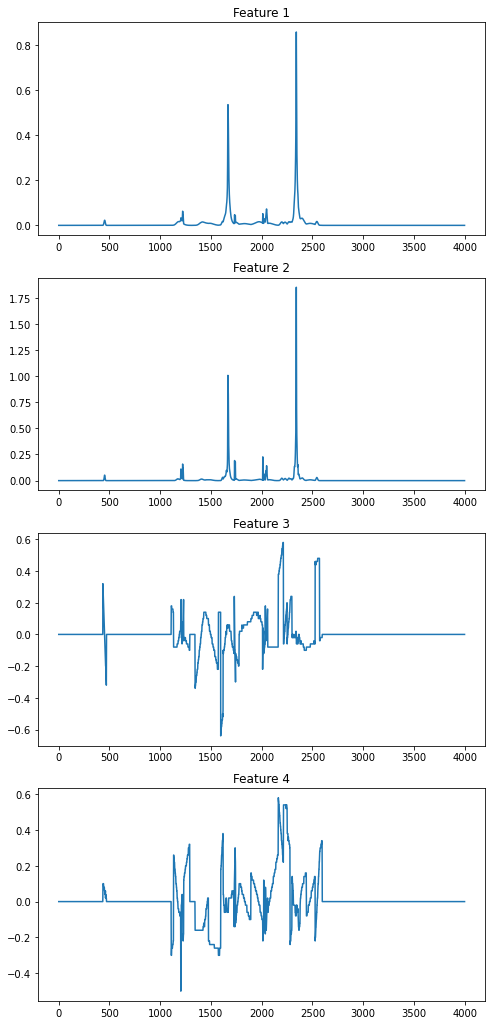

In [18]:
plt.figure(figsize=(8,18))
for i in range(4):
  plt.subplot(4,1,i+1)
  plt.plot(np.arange(4000),X_set[0][i])
  plt.title("Feature "+str(i+1))
  # labels= ["feature 1","feature 2", "feature 3","feature 4"]
  # plt.legend(labels,loc="upper right")

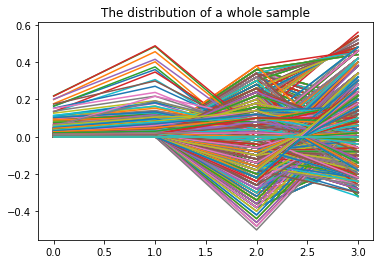

In [19]:
plt.plot(X_set[1])
plt.title("The distribution of a whole sample")
plt.show()

In [20]:
X_set[1].shape

(4, 4000)

The data is all uniformly distributed

In [21]:
a="feature "+str(1)
a

'feature 1'

In [22]:
import pandas as pd

In [23]:
df=pd.DataFrame()
for i in range(4):
  a="feature "+str(i+1)
  df[a]=X_set[3000][i]

Text(0.5, 1.0, 'The correlation between records of a sample 3000 of set 4')

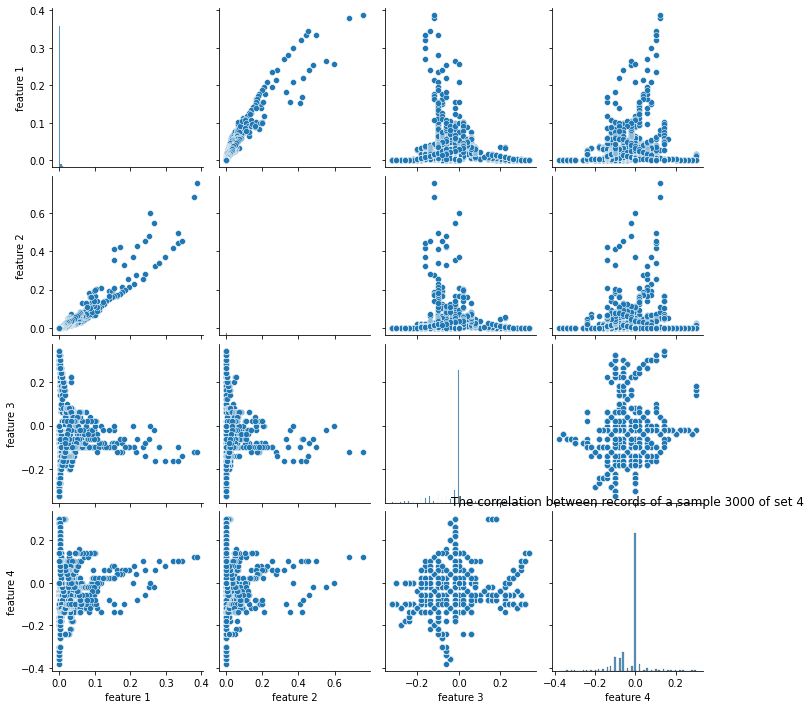

In [24]:
sns.pairplot(df)
plt.title("The correlation between records of a sample 3000 of set 4")

In [25]:
df=pd.DataFrame()
for i in range(4):
  a="feature "+str(i+1)
  df[a]=X_set[15][i]

Text(0.5, 1.0, 'The correlation between records of a sample 15 of set 4')

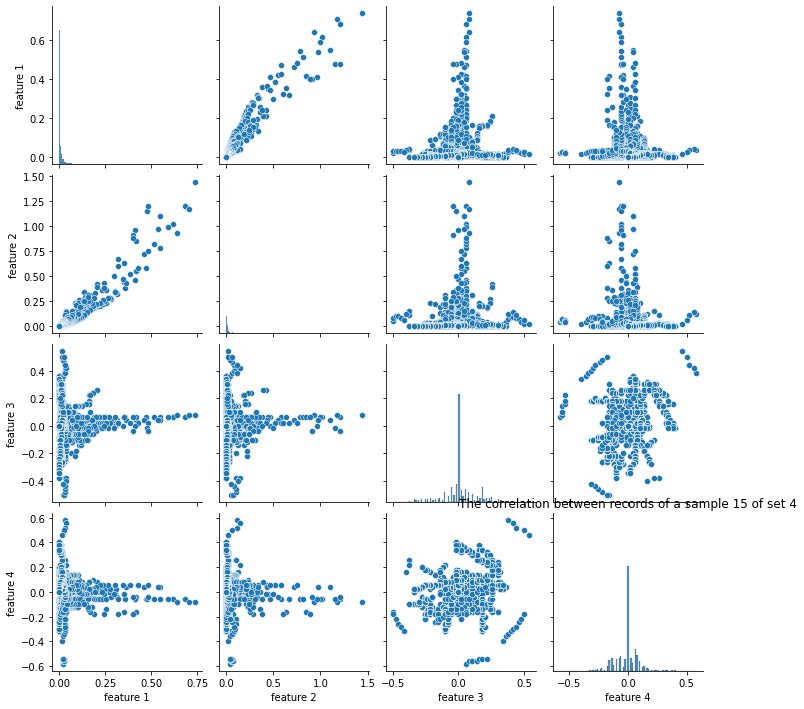

In [26]:
sns.pairplot(df)
plt.title("The correlation between records of a sample 15 of set 4")

In [27]:
df=pd.DataFrame()
for i in range(4):
  a="feature "+str(i+1)
  df[a]=X_set[2199][i]

Text(0.5, 1.0, 'The correlation between records of a sample 2199 of set 4')

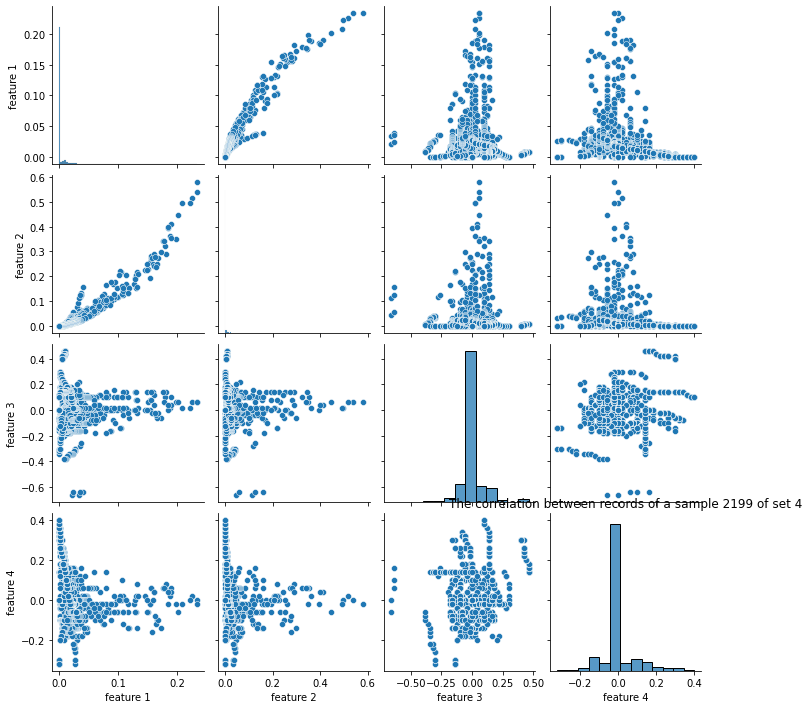

In [28]:
sns.pairplot(df)
plt.title("The correlation between records of a sample 2199 of set 4")

In [29]:
y_set[2199].shape

(4000,)

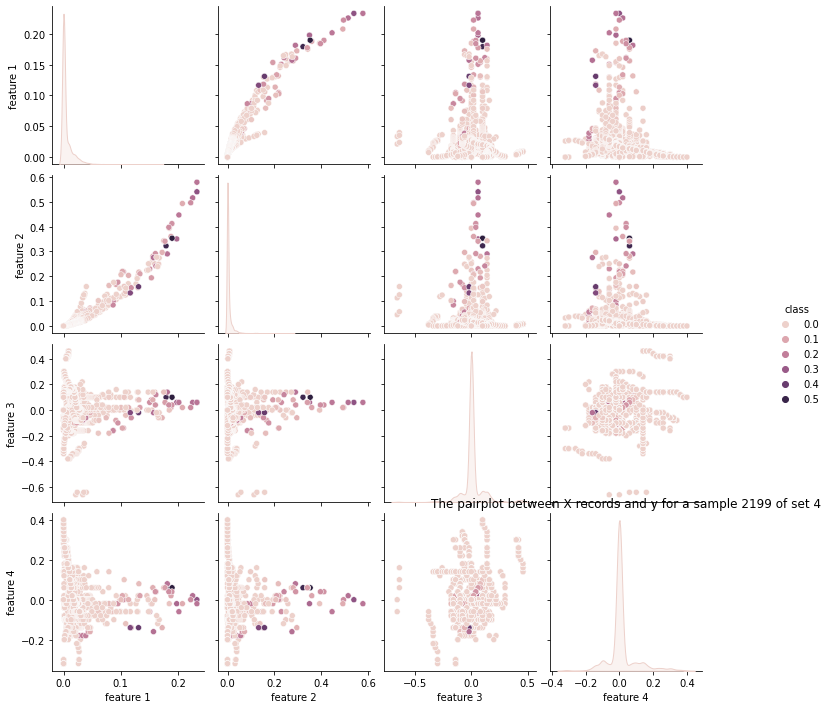

In [31]:
df["class"]=y_set[2199]
sns.pairplot(df,hue="class")
plt.title("The pairplot between X records and y for a sample 2199 of set 4")
plt.show()

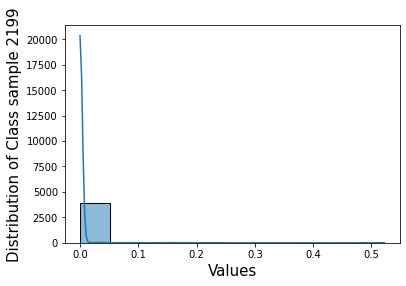

In [32]:
sns.histplot(y_set[2199], kde=True, bins=10)  
plt.ylabel("Distribution of Class sample 2199",fontsize=15)
plt.xlabel("Values",fontsize=15)
plt.show()

Text(0.5, 1.0, 'The line plot of class')

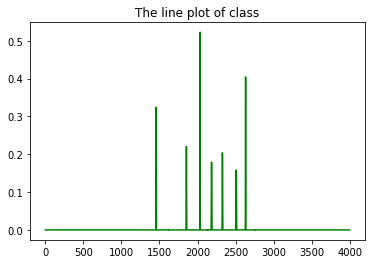

In [33]:
plt.plot(np.arange(4000),y_set[2199],'g-')
plt.title("The line plot of class")

Text(0.5, 1.0, 'The distibution of all class samples')

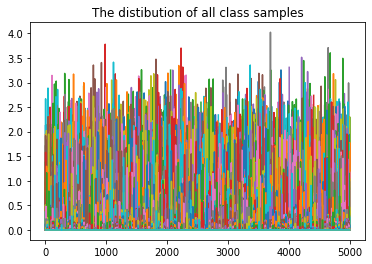

In [34]:
plt.plot(y_set[:])
plt.title("The distibution of all class samples")

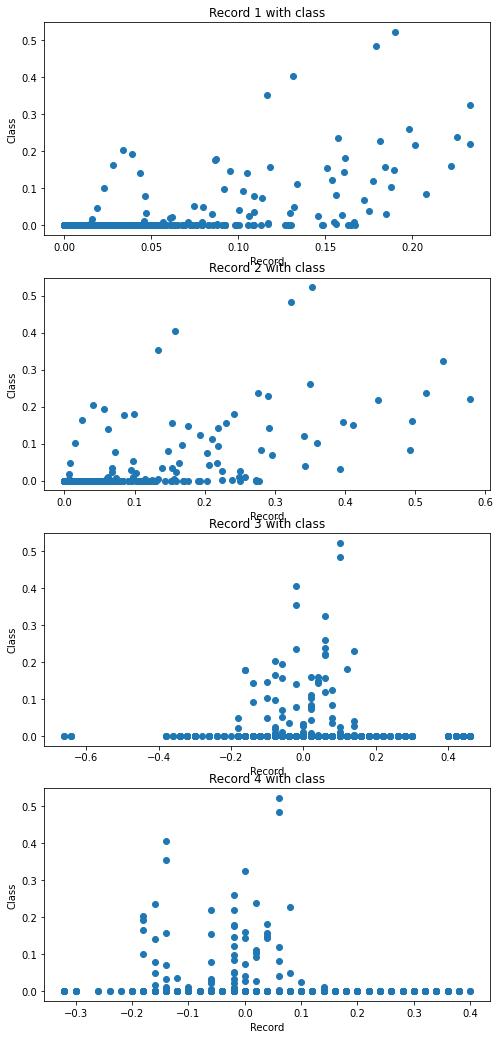

In [35]:
plt.figure(figsize=(8,18))
for i in range(4):
  plt.subplot(4,1,i+1)
  plt.scatter(X_set[2199][i],y_set[2199])
  plt.xlabel("Record")
  plt.ylabel("Class")
  plt.title("Record "+str(i+1)+" with class")
plt.show()  

In [36]:
x=MyDataset(2)
# print(x)
train_loader = torch.utils.data.DataLoader(x,  
                                             batch_size = 128,  
                                             shuffle = True)
i=0
for X_train, y_train in train_loader:
  i=i+1
    # print(X_train.shape) 
    # print(y_train.shape)
print(i)    

40


In [37]:
loss_model=Loss(0.00001)

In [38]:
from torch.nn.quantized.modules.dropout import Dropout
class MLP10(torch.nn.Module):

  def __init__(self, num_features, num_classes,num_hidden_1, num_hidden_2,num_hidden_3):


    super().__init__()
    self.my_network = torch.nn.Sequential(
# 1st hidden layer
          torch.nn.Flatten(),
          torch.nn.Linear(num_features, num_hidden_1),
          torch.nn.Dropout(0.3),
          torch.nn.ReLU(),
          
# 2nd hidden layer
          torch.nn.Linear(num_hidden_1, num_hidden_2),
          torch.nn.Dropout(0.4),
          torch.nn.ReLU(),
# 3rd hidden layer
          torch.nn.Linear(num_hidden_2,num_hidden_3),
          torch.nn.Dropout(0.6),
          torch.nn.ReLU(),
# output layer
          torch.nn.Linear(num_hidden_3, num_classes)
)
    
    # for m in self.modules():
    #   if isinstance(m, torch.nn.Linear):
    #     torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
    #     if m.bias is not None:
    #       m.bias.detach().zero_()
  def forward(self,x):
    logits=self.my_network(x)
    activations=logits
    return activations      


In [39]:
def train(model, num_epochs,
          learning_rate=0.01, seed=123, batch_size=128):
    cost = []
    
    torch.manual_seed(seed)
    
    optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
    
    for e in range(1,num_epochs):
      batch_num = 0
      for setID in train_set_idx:
          train_set = MyDataset(setID+1)
          train_generator = torch.utils.data.DataLoader(train_set, 
                                                        batch_size=batch_size, 
      shuffle=True)
          print(setID)
          for X_train, y_train in train_generator:
            X_train=X_train.to(DEVICE)
            y_train=y_train.to(DEVICE)
            batch_num = batch_num + 1
            #### Compute outputs ####
            yhat = model(X_train)
            loss = loss_model.forward(yhat, y_train)
            optimizer.zero_grad()
            
            #### Compute gradients ####
            loss.backward()
            
            #### Update weights ####
            optimizer.step()
            #### Logging ####
            with torch.no_grad():
                yhat = model.forward(X_train)
                curr_loss = loss_model.forward(yhat, y_train)
                print('Epoch ID: %d ' % e, end="")
                print('  Set ID: %d' % setID, end="")
                print('  Batch ID: %d' % batch_num, end="")
                print(' | Loss: %.5f' % curr_loss)
                cost.append(curr_loss)
    return cost

In [40]:
torch.manual_seed(123)
model1=MLP10(num_features=4*4000,
            num_hidden_1=8000,
            num_hidden_2=6000,
            num_hidden_3=4000,
            # num_hidden_4=6000,
            num_classes=4000)
model=model1.to(DEVICE)

In [41]:
import torch
torch.cuda.empty_cache()

In [42]:
cost=train(model,num_epochs=NUM_EPOCHS,learning_rate=0.00001,seed=123,batch_size=128)

21
Epoch ID: 1   Set ID: 21  Batch ID: 1 | Loss: 5.79279
Epoch ID: 1   Set ID: 21  Batch ID: 2 | Loss: 5.76835
Epoch ID: 1   Set ID: 21  Batch ID: 3 | Loss: 5.74697
Epoch ID: 1   Set ID: 21  Batch ID: 4 | Loss: 5.72916
Epoch ID: 1   Set ID: 21  Batch ID: 5 | Loss: 5.72394
Epoch ID: 1   Set ID: 21  Batch ID: 6 | Loss: 5.73136
Epoch ID: 1   Set ID: 21  Batch ID: 7 | Loss: 5.71139
Epoch ID: 1   Set ID: 21  Batch ID: 8 | Loss: 5.71209
Epoch ID: 1   Set ID: 21  Batch ID: 9 | Loss: 5.70475
Epoch ID: 1   Set ID: 21  Batch ID: 10 | Loss: 5.70284
Epoch ID: 1   Set ID: 21  Batch ID: 11 | Loss: 5.70433
Epoch ID: 1   Set ID: 21  Batch ID: 12 | Loss: 5.71088
Epoch ID: 1   Set ID: 21  Batch ID: 13 | Loss: 5.71322
Epoch ID: 1   Set ID: 21  Batch ID: 14 | Loss: 5.68577
Epoch ID: 1   Set ID: 21  Batch ID: 15 | Loss: 5.70622
Epoch ID: 1   Set ID: 21  Batch ID: 16 | Loss: 5.67817
Epoch ID: 1   Set ID: 21  Batch ID: 17 | Loss: 5.68858
Epoch ID: 1   Set ID: 21  Batch ID: 18 | Loss: 5.68794
Epoch ID: 1   Se

In [43]:
def validate(model):
    loss_val = []
    eff = ValueSet(0, 0, 0, 0)
    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        for setID in val_set_idx:
          val_set = MyDataset(setID+1)
          val_generator = torch.utils.data.DataLoader(val_set, 
                                                      batch_size=1024, 
    shuffle=True)
          print(setID)
          for X_val, y_val in val_generator:
            X_val=X_val.to(DEVICE)
            y_val=y_val.to(DEVICE)
            # Forward pass
            val_outputs = model(X_val)
            loss_output = loss_model.forward(val_outputs, y_val)
            loss_val.append(loss_output)
            for label, output in zip(y_val.cpu().numpy(), val_outputs.cpu().numpy()):
                eff += efficiency(label, output, difference = 5.0, 
                                  threshold = 1e-2, integral_threshold = 0.2, 
                                  min_width = 3)
    return sum(loss_val)/len(loss_val), eff.eff_rate, eff.fp_rate

In [44]:
loss_val, eff_rate, fp_rate = validate(model)
print('Loss: %0.3f ' % loss_val, end="")
print('  Efficiency: %0.3f' % eff_rate, end="")
print('  False positive rate: %0.3f' % fp_rate)

18
60
61
42
4
33
19
9
59
72
Loss: 5.106   Efficiency: 0.000  False positive rate: 0.000


In [45]:
# model.load_state_dict(torch.load('model1.pt'))
model.eval()

MLP10(
  (my_network): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16000, out_features=8000, bias=True)
    (2): Dropout(p=0.3, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=8000, out_features=6000, bias=True)
    (5): Dropout(p=0.4, inplace=False)
    (6): ReLU()
    (7): Linear(in_features=6000, out_features=4000, bias=True)
    (8): Dropout(p=0.6, inplace=False)
    (9): ReLU()
    (10): Linear(in_features=4000, out_features=4000, bias=True)
  )
)

In [46]:

b=torch.tensor(cost)
cost1=b.cpu().numpy()
cost1[-1]

6.1080647

In [49]:
loss_test=loss_val.cpu().numpy()
loss_test

array(5.105695, dtype=float32)

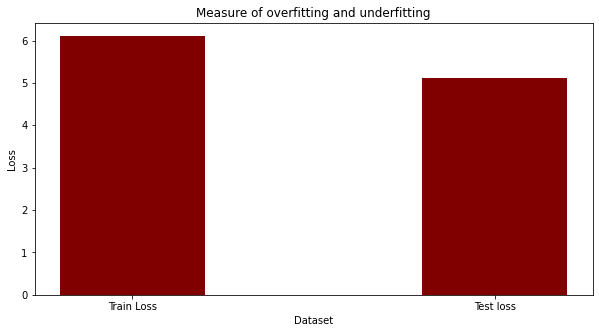

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

 
  
# creating the dataset
data = {'Train Loss':cost1[-1], 'Test loss':loss_test}
TrainTest = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(TrainTest, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Dataset")
plt.ylabel("Loss")
plt.title("Measure of overfitting and underfitting")
plt.show()

In [52]:
def train(model,train_set_idx, num_epochs,
          learning_rate=0.01, seed=123, batch_size=128):
    cost = []
    
    torch.manual_seed(seed)
    
    optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)
    
    for e in range(1,num_epochs):
      batch_num = 0
      for setID in train_set_idx:
          train_set = MyDataset(setID+1)
          train_generator = torch.utils.data.DataLoader(train_set, 
                                                        batch_size=batch_size, 
      shuffle=True)
          print(setID)
          for X_train, y_train in train_generator:
            X_train=X_train.to(DEVICE)
            y_train=y_train.to(DEVICE)
            batch_num = batch_num + 1
            #### Compute outputs ####
            yhat = model(X_train)
            loss = loss_model.forward(yhat, y_train)
            optimizer.zero_grad()
            
            #### Compute gradients ####
            loss.backward()
            
            #### Update weights ####
            optimizer.step()
            #### Logging ####
            with torch.no_grad():
                yhat = model.forward(X_train)
                curr_loss = loss_model.forward(yhat, y_train)
                cost.append(curr_loss)
    return cost

In [53]:
def validate(model,val_set_idx):
    loss_val = []
    eff = ValueSet(0, 0, 0, 0)
    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        for setID in val_set_idx:
          val_set = MyDataset(setID+1)
          val_generator = torch.utils.data.DataLoader(val_set, 
                                                      batch_size=1024, 
    shuffle=True)
          # print(setID)
          for X_val, y_val in val_generator:
            X_val=X_val.to(DEVICE)
            y_val=y_val.to(DEVICE)
            # Forward pass
            val_outputs = model(X_val)
            loss_output = loss_model.forward(val_outputs, y_val)
            loss_val.append(loss_output)
            for label, output in zip(y_val.cpu().numpy(), val_outputs.cpu().numpy()):
                eff += efficiency(label, output, difference = 5.0, 
                                  threshold = 1e-2, integral_threshold = 0.2, 
                                  min_width = 3)
    return sum(loss_val)/len(loss_val), eff.eff_rate, eff.fp_rate

In [54]:
a=[15,24,40,50]
train_cost=[]
test_cost=[]
for i in a:
  train_set_idx, val_set_idx=train_test_split(list(range(1,80)),test_size=i)
  torch.manual_seed(123)
  model1=MLP10(num_features=4*4000,
            num_hidden_1=8000,
            num_hidden_2=6000,
            num_hidden_3=4000,
            # num_hidden_4=6000,
            num_classes=4000)
  model=model1.to(DEVICE)
  cost=train(model,train_set_idx,num_epochs=NUM_EPOCHS,learning_rate=0.00001,seed=123,batch_size=128)
  b=torch.tensor(cost)
  cost1=b.cpu().numpy()
  train_cost.append(cost1[-1])
  loss_val, eff_rate, fp_rate = validate(model,val_set_idx)
  loss_test=loss_val.cpu().numpy()
  loss_test
  test_cost.append(loss_test)

66
1
32
56
71
17
53
29
60
78
47
31
20
15
7
39
74
5
2
38
21
51
33
27
4
59
22
12
42
48
43
26
62
30
8
70
3
75
18
55
72
46
35
28
45
69
79
61
11
16
49
52
34
19
54
57
50
37
10
25
13
63
58
24
2
72
39
77
36
40
38
12
41
4
70
63
10
6
22
28
52
49
33
57
11
54
47
75
74
23
25
59
5
79
34
31
73
21
14
64
19
7
29
46
43
27
42
68
15
67
45
78
26
71
58
76
53
30
60
71
19
54
60
14
66
31
74
10
69
52
65
2
50
29
68
51
11
62
70
75
42
27
76
21
1
7
53
32
12
8
5
26
15
13
58
49
77
37
69
24
35
22
14
31
61
65
46
20
47
3
10
21
8
27
57
56
58
50
6
18
54
48
70
72
12
43
37


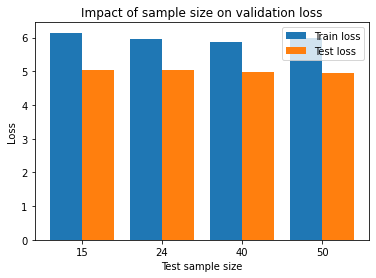

In [68]:
X = ['15','24','40','50']
f = train_cost
g = test_cost
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, f, 0.4, label = 'Train loss')
plt.bar(X_axis + 0.2, g, 0.4, label = 'Test loss')
  
plt.xticks(X_axis, X)
plt.xlabel("Test sample size")
plt.ylabel("Loss")
plt.title("Impact of sample size on validation loss")
plt.legend()
plt.show()